# Profiling the Java Memory Model

In [1]:
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
ROOT_DIR = Path().resolve().parent.parent
# CSV_FILENAME = "_12_23_10.csv"
# CSV_FILENAME = "_12_23_36.csv"k
CSV_FILENAME = "_13_00_10.csv"
DATA_DIR = Path(f"profiling/{CSV_FILENAME}")
DATA_PATH = ROOT_DIR / DATA_DIR

In [3]:
df = pd.read_csv(DATA_PATH)
df.head()

,n_values,n_threads,virtual,state_type,total_time,avg_time,n_mismatches
0,5,1,True,AcmeSafe,0.839438,8.394384,0
1,5,1,True,Synchronized,1.003011,10.030111,0
2,5,1,True,Unsynchronized,0.850036,8.500365,0
3,5,1,False,AcmeSafe,1.056725,10.567255,0
4,5,1,False,Synchronized,1.608919,16.089192,0


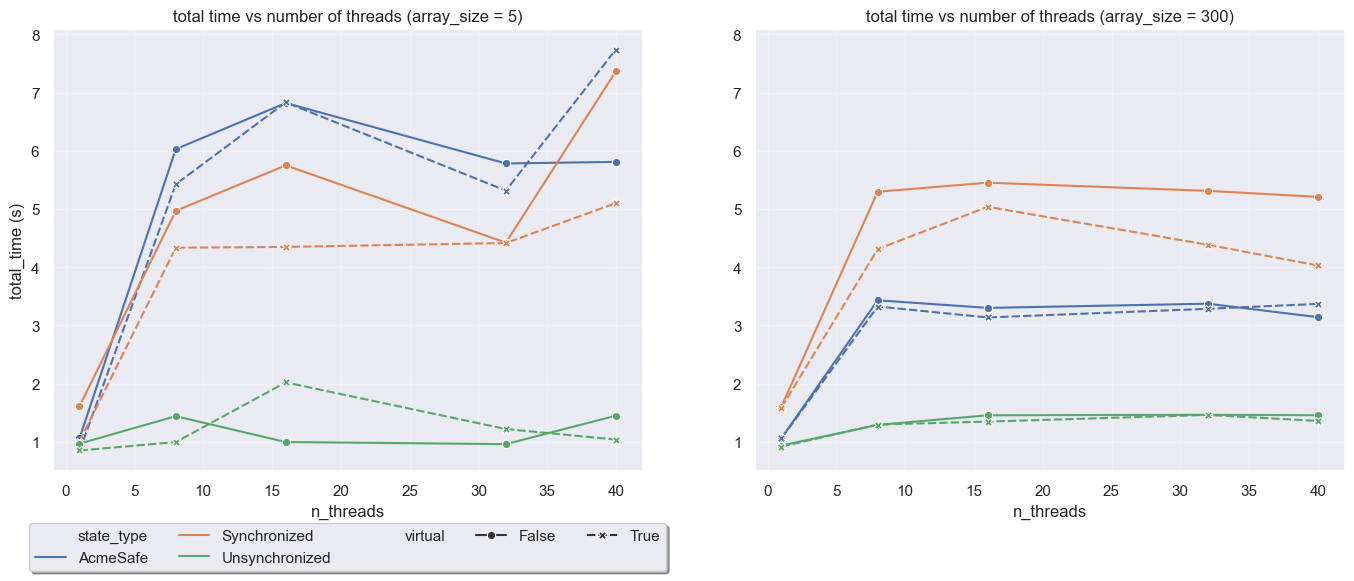

In [16]:
plot_df_5 = df[df["n_values"] == 5]
plot_df_300 = df[df["n_values"] == 300]
plot_df_100 = df[df["n_values"] == 100]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.lineplot(
    plot_df_5,
    x="n_threads",
    y="total_time",
    hue="state_type",
    style="virtual",
    markers=True,
    ax=ax1,
)
sns.lineplot(
    plot_df_100,
    x="n_threads",
    y="total_time",
    hue="state_type",
    style="virtual",
    markers=True,
    ax=ax2,
)
ax1.set_xlabel("n_threads")
ax1.set_ylabel("total_time (s)")
ax1.set_title("total time vs number of threads (array_size = 5)")
ax1.grid(True, alpha=0.3)
ax2.set_xlabel("n_threads")
ax2.set_title("total time vs number of threads (array_size = 300)")
ax2.grid(True, alpha=0.3)
ax2.tick_params(labelleft=True)
ax1.legend(
    loc="upper center", bbox_to_anchor=(0.5, -0.10), fancybox=True, shadow=True, ncol=5
)
ax2.get_legend().remove()

plt.tight_layout()
plt.show()

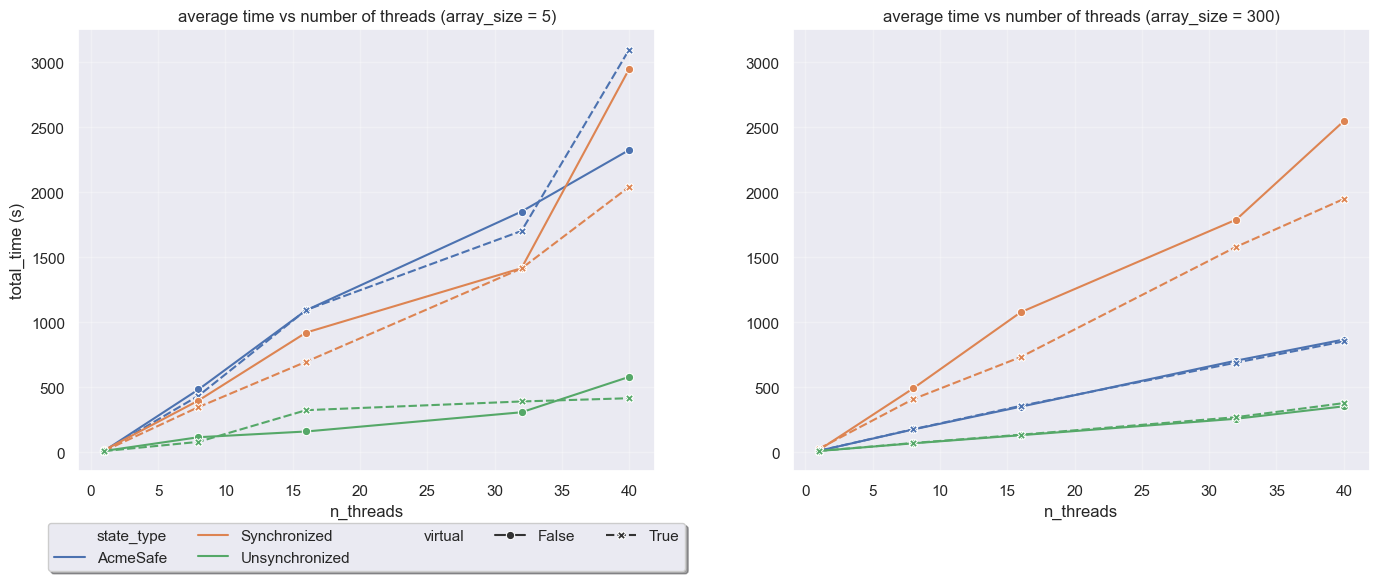

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.lineplot(
    plot_df_5,
    x="n_threads",
    y="avg_time",
    hue="state_type",
    style="virtual",
    markers=True,
    ax=ax1,
)
sns.lineplot(
    plot_df_300,
    x="n_threads",
    y="avg_time",
    hue="state_type",
    style="virtual",
    markers=True,
    ax=ax2,
)
ax1.set_xlabel("n_threads")
ax1.set_ylabel("total_time (s)")
ax1.set_title("average time vs number of threads (array_size = 5)")
ax1.grid(True, alpha=0.3)
ax2.set_xlabel("n_threads")
ax2.set_title("average time vs number of threads (array_size = 300)")
ax2.grid(True, alpha=0.3)
ax2.tick_params(labelleft=True)
ax1.legend(
    loc="upper center", bbox_to_anchor=(0.5, -0.10), fancybox=True, shadow=True, ncol=5
)
ax2.get_legend().remove()

plt.tight_layout()
plt.show()

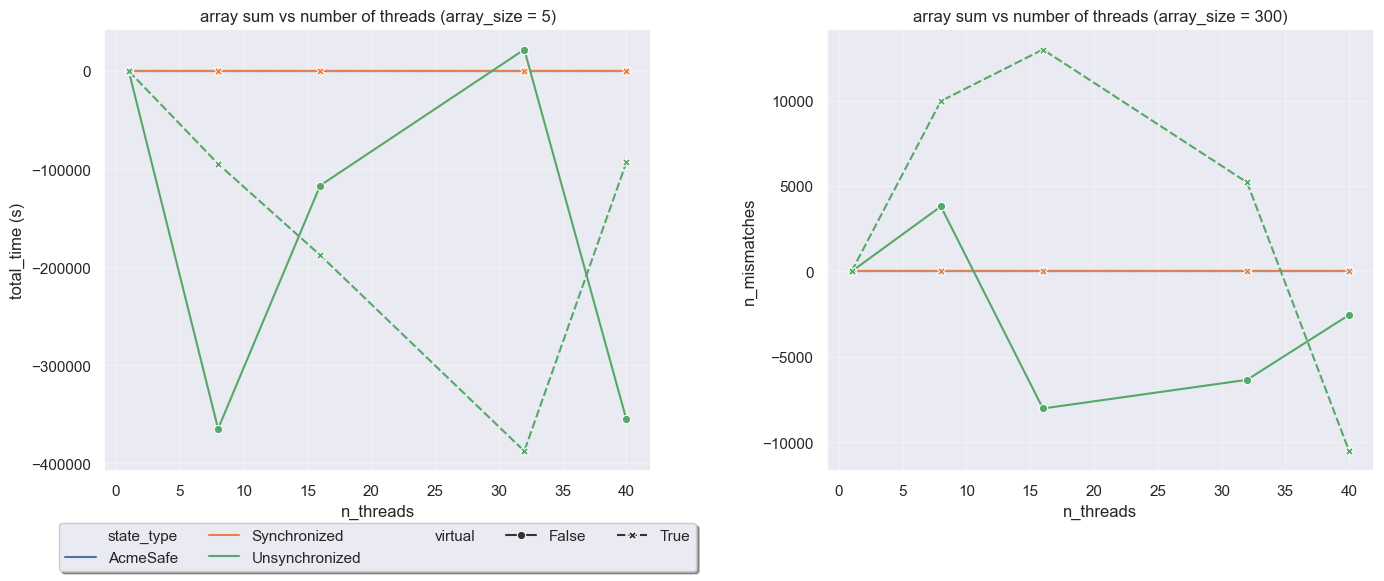

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=False)
sns.lineplot(
    plot_df_5,
    x="n_threads",
    y="n_mismatches",
    hue="state_type",
    style="virtual",
    markers=True,
    ax=ax1,
)
sns.lineplot(
    plot_df_300,
    x="n_threads",
    y="n_mismatches",
    hue="state_type",
    style="virtual",
    markers=True,
    ax=ax2,
)
ax1.set_xlabel("n_threads")
ax1.set_ylabel("total_time (s)")
ax1.set_title("array sum vs number of threads (array_size = 5)")
ax1.grid(True, alpha=0.3)
ax2.set_xlabel("n_threads")
ax2.set_title("array sum vs number of threads (array_size = 300)")
ax2.grid(True, alpha=0.3)
ax2.tick_params(labelleft=True)
ax1.legend(
    loc="upper center", bbox_to_anchor=(0.5, -0.10), fancybox=True, shadow=True, ncol=5
)
ax2.get_legend().remove()

plt.tight_layout()
plt.show()

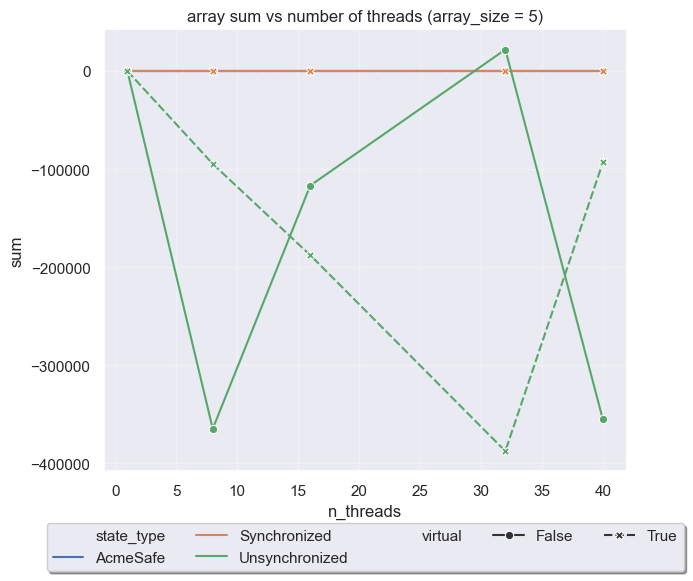

In [7]:
plt.figure(figsize=(7, 6))
sns.lineplot(
    plot_df_5,
    x="n_threads",
    y="n_mismatches",
    hue="state_type",
    style="virtual",
    markers=True,
)
ax = plt.gca()
plt.xlabel("n_threads")
plt.ylabel("sum")
plt.title("array sum vs number of threads (array_size = 5)")
plt.grid(True, alpha=0.3)
plt.legend(
    loc="upper center", bbox_to_anchor=(0.5, -0.10), fancybox=True, shadow=True, ncol=5
)

plt.tight_layout()
plt.show()

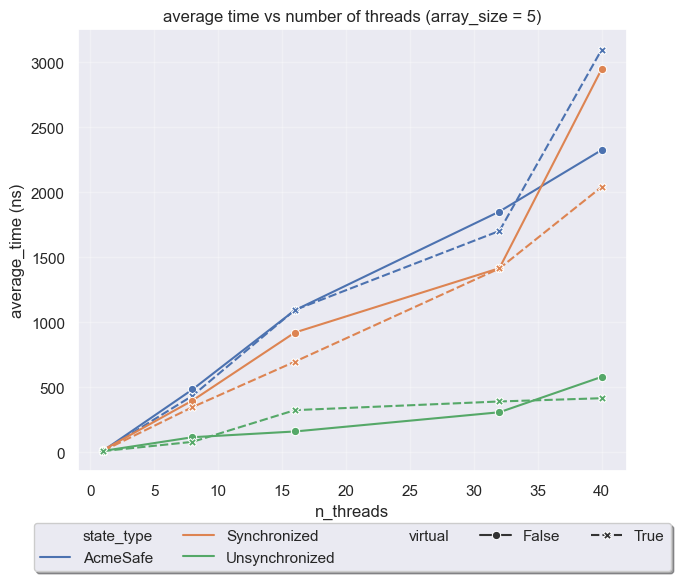

In [8]:
plt.figure(figsize=(7, 6))
sns.lineplot(
    plot_df_5,
    x="n_threads",
    y="avg_time",
    hue="state_type",
    style="virtual",
    markers=True,
)
ax = plt.gca()
plt.xlabel("n_threads")
plt.ylabel("average_time (ns)")
plt.title("average time vs number of threads (array_size = 5)")
plt.grid(True, alpha=0.3)
plt.legend(
    loc="upper center", bbox_to_anchor=(0.5, -0.10), fancybox=True, shadow=True, ncol=5
)

plt.tight_layout()
plt.show()

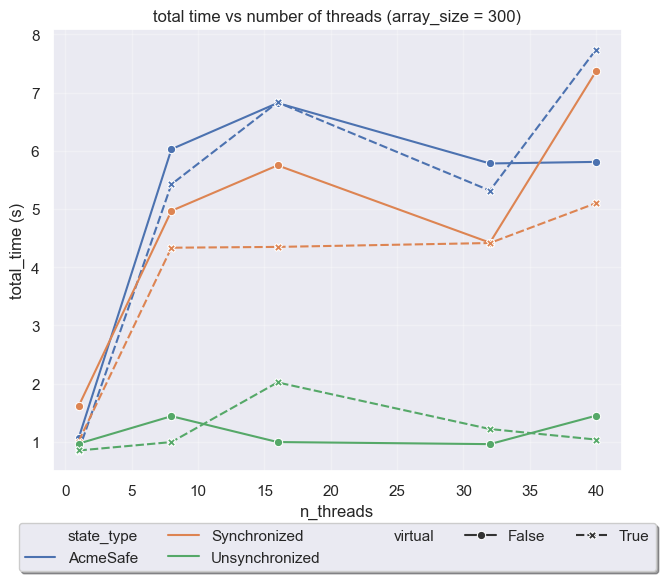

In [9]:
plot_df_300 = df[df["n_values"] == 300]

plt.figure(figsize=(7, 6))
sns.lineplot(
    plot_df_5,
    x="n_threads",
    y="total_time",
    hue="state_type",
    style="virtual",
    markers=True,
)
ax = plt.gca()
plt.xlabel("n_threads")
plt.ylabel("total_time (s)")
plt.title("total time vs number of threads (array_size = 300)")
plt.grid(True, alpha=0.3)
plt.legend(
    loc="upper center", bbox_to_anchor=(0.5, -0.10), fancybox=True, shadow=True, ncol=5
)

plt.tight_layout()
plt.show()

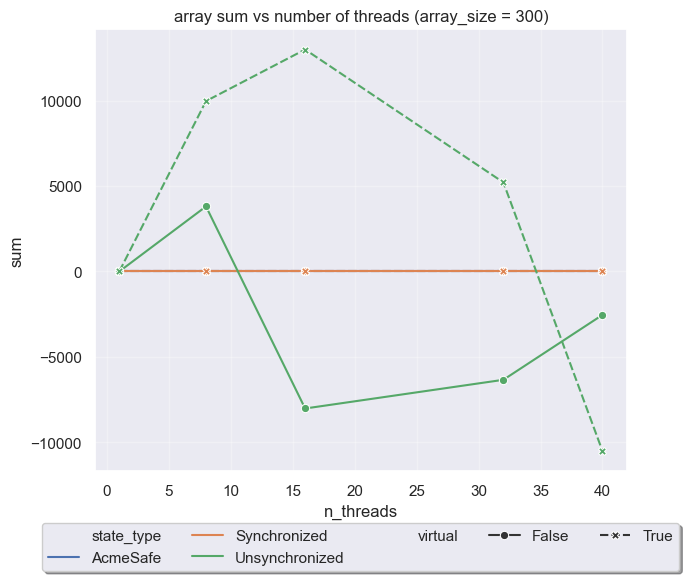

In [10]:
plt.figure(figsize=(7, 6))
sns.lineplot(
    plot_df_300,
    x="n_threads",
    y="n_mismatches",
    hue="state_type",
    style="virtual",
    markers=True,
)
ax = plt.gca()
plt.xlabel("n_threads")
plt.ylabel("sum")
plt.title("array sum vs number of threads (array_size = 300)")
plt.grid(True, alpha=0.3)
plt.legend(
    loc="upper center", bbox_to_anchor=(0.5, -0.10), fancybox=True, shadow=True, ncol=5
)

plt.tight_layout()
plt.show()

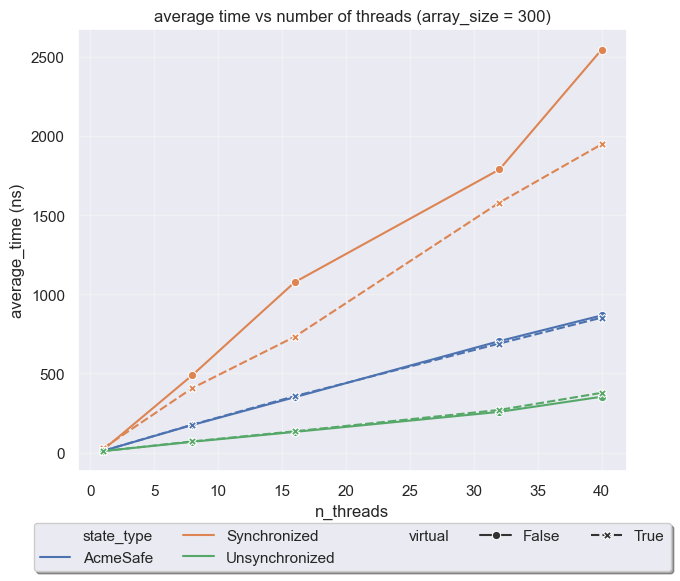

In [11]:
plt.figure(figsize=(7, 6))
sns.lineplot(
    plot_df_300,
    x="n_threads",
    y="avg_time",
    hue="state_type",
    style="virtual",
    markers=True,
)
ax = plt.gca()
plt.xlabel("n_threads")
plt.ylabel("average_time (ns)")
plt.title("average time vs number of threads (array_size = 300)")
plt.grid(True, alpha=0.3)
plt.legend(
    loc="upper center", bbox_to_anchor=(0.5, -0.10), fancybox=True, shadow=True, ncol=5
)

plt.tight_layout()
plt.show()